In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 143M/149M [00:01<00:00, 166MB/s]
100% 149M/149M [00:01<00:00, 149MB/s]


In [3]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df


In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_1248.jpg,glioma
1,/content/Training/glioma/Tr-gl_0416.jpg,glioma
2,/content/Training/glioma/Tr-gl_0619.jpg,glioma
3,/content/Training/glioma/Tr-gl_0329.jpg,glioma
4,/content/Training/glioma/Tr-gl_0055.jpg,glioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1444.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0037.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0333.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1200.jpg,pituitary


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0289.jpg,glioma
1,/content/Testing/glioma/Te-gl_0295.jpg,glioma
2,/content/Testing/glioma/Te-gl_0167.jpg,glioma
3,/content/Testing/glioma/Te-gl_0237.jpg,glioma
4,/content/Testing/glioma/Te-gl_0084.jpg,glioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0246.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0206.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0184.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0178.jpg,pituitary


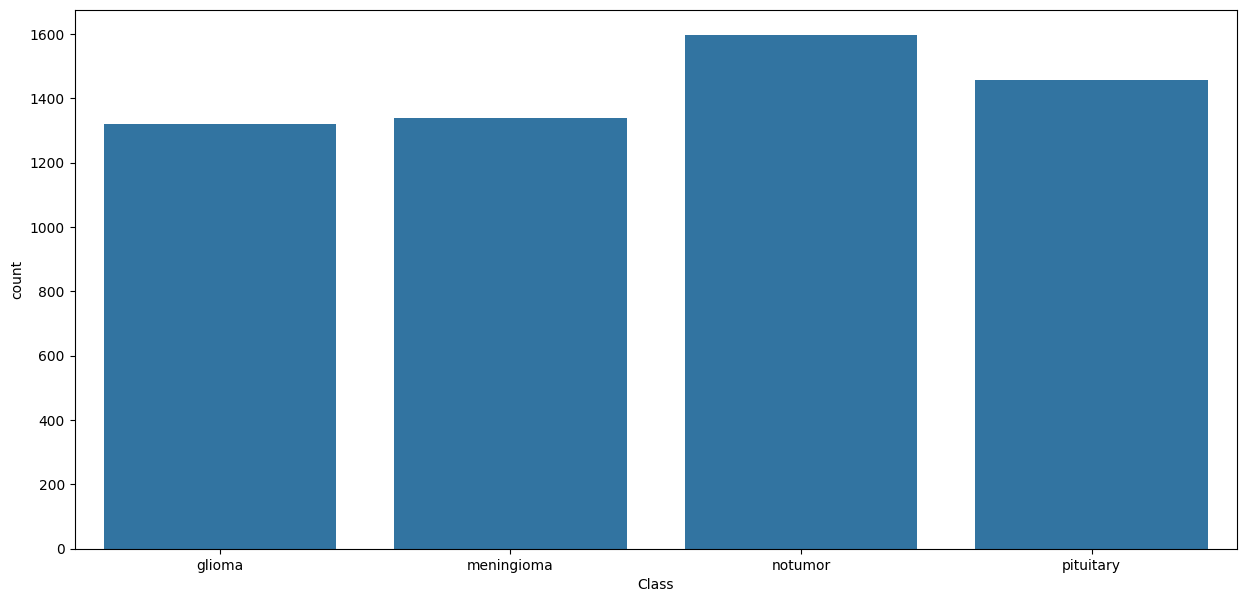

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

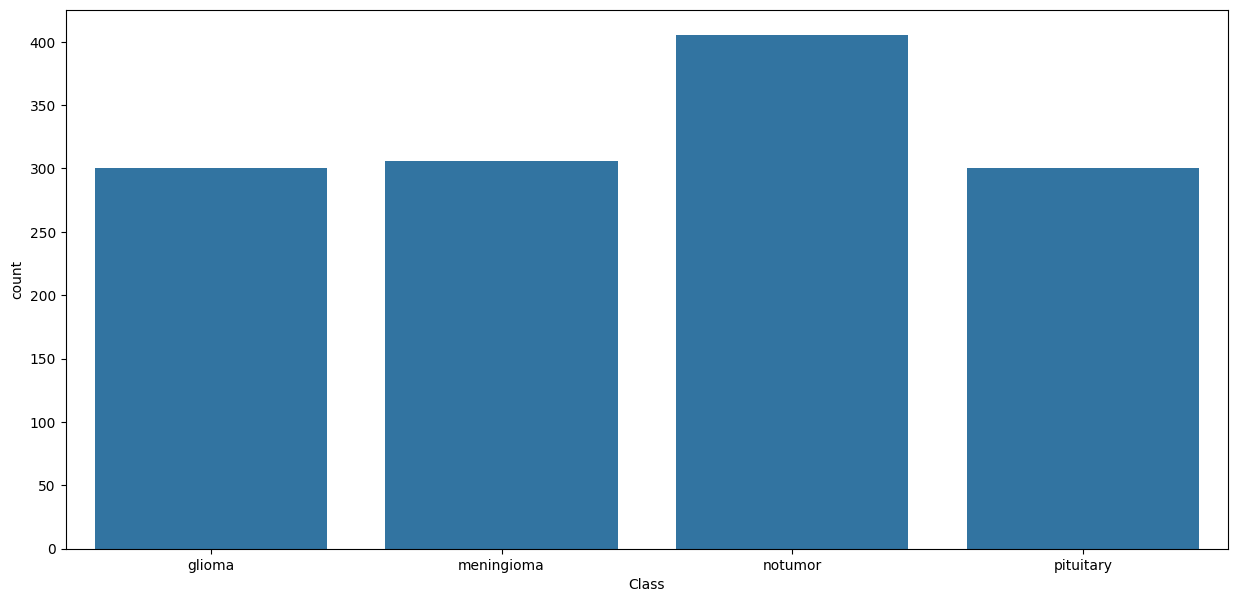

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
571,/content/Testing/meningioma/Te-me_0268.jpg,meningioma
252,/content/Testing/glioma/Te-gl_0250.jpg,glioma
1030,/content/Testing/pituitary/Te-pi_0022.jpg,pituitary
278,/content/Testing/glioma/Te-gl_0207.jpg,glioma
66,/content/Testing/glioma/Te-gl_0026.jpg,glioma
...,...,...
1230,/content/Testing/pituitary/Te-pi_0089.jpg,pituitary
921,/content/Testing/notumor/Te-noTr_0003.jpg,notumor
1051,/content/Testing/pituitary/Te-pi_0295.jpg,pituitary
585,/content/Testing/meningioma/Te-me_0239.jpg,meningioma


In [13]:
ts_df

,Class Path,Class
1021,/content/Testing/pituitary/Te-pi_0153.jpg,pituitary
827,/content/Testing/notumor/Te-no_0092.jpg,notumor
1278,/content/Testing/pituitary/Te-pi_0223.jpg,pituitary
756,/content/Testing/notumor/Te-no_0341.jpg,notumor
387,/content/Testing/meningioma/Te-me_0090.jpg,meningioma
...,...,...
618,/content/Testing/notumor/Te-no_0346.jpg,notumor
877,/content/Testing/notumor/Te-no_0358.jpg,notumor
165,/content/Testing/glioma/Te-gl_0271.jpg,glioma
254,/content/Testing/glioma/Te-gl_0067.jpg,glioma


In [14]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)



In [15]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


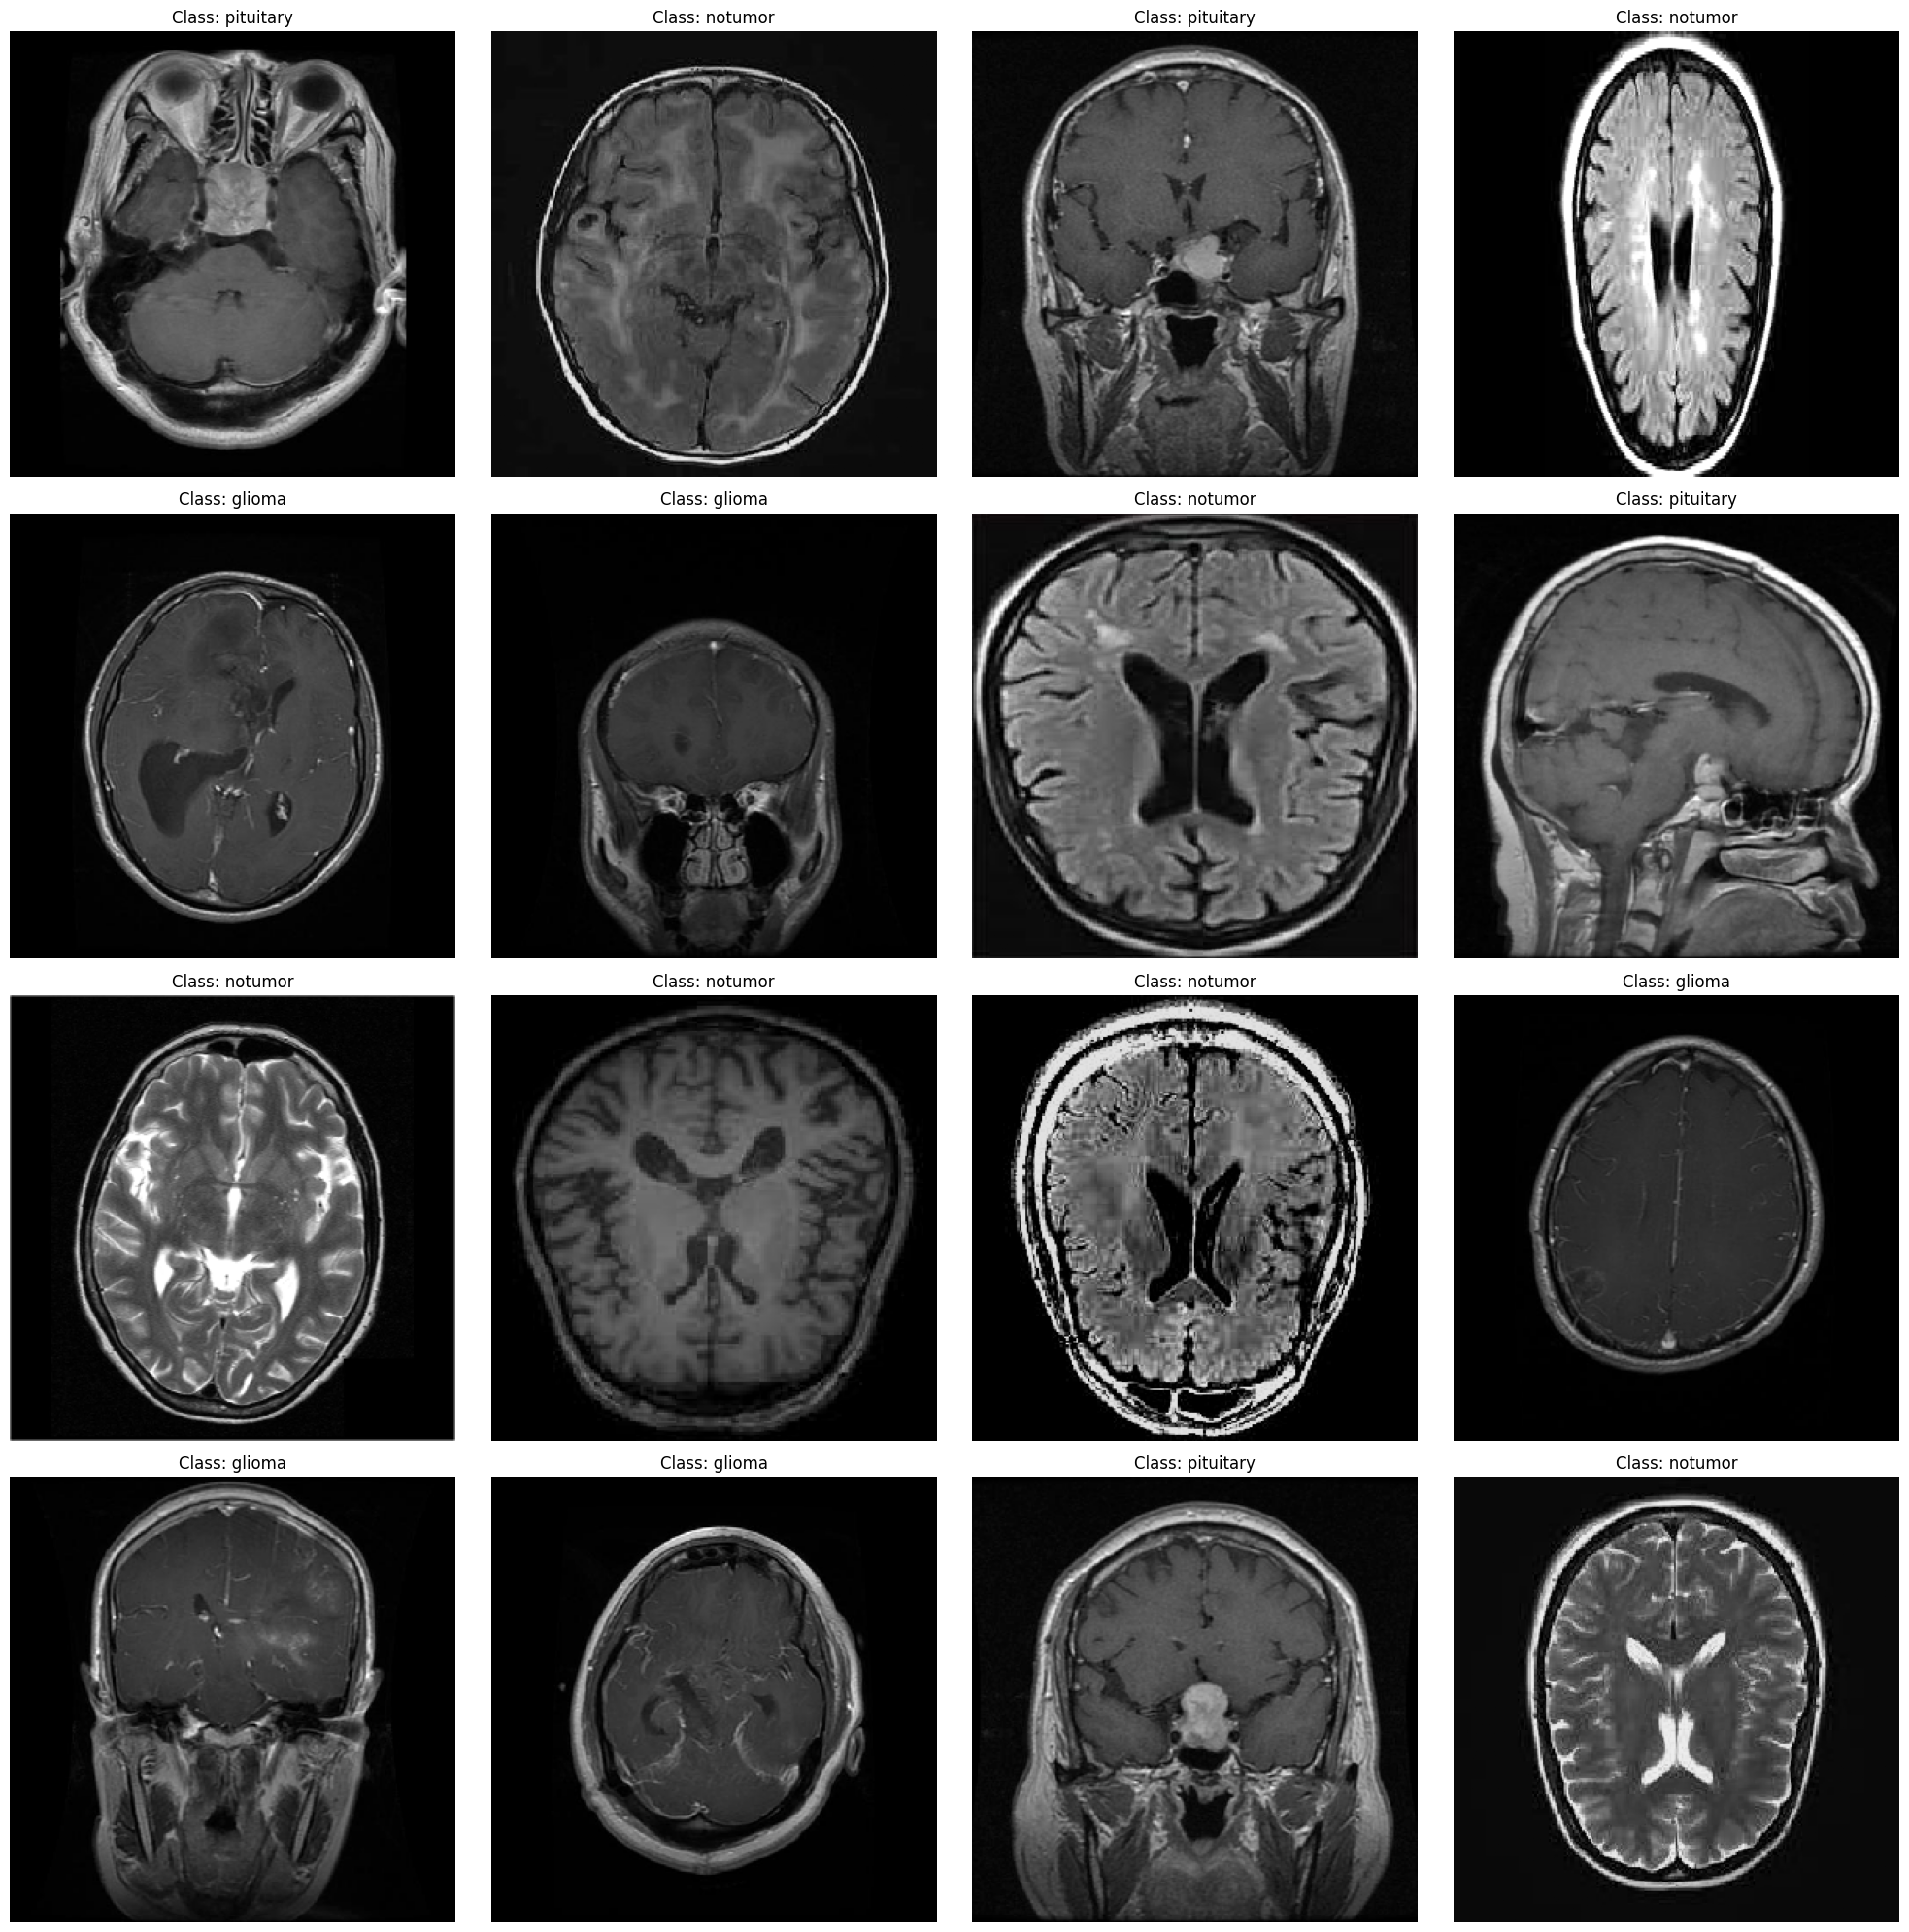

In [16]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
 img_shape = (299, 299, 3)
 base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling="max"
)
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)


In [19]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.8067 - loss: 0.5738 - precision: 0.8513 - recall: 0.7201 - val_accuracy: 0.9374 - val_loss: 0.1887 - val_precision: 0.9414 - val_recall: 0.9313
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 817ms/step - accuracy: 0.9822 - loss: 0.0618 - precision: 0.9836 - recall: 0.9816 - val_accuracy: 0.9725 - val_loss: 0.0655 - val_precision: 0.9725 - val_recall: 0.9725
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 818ms/step - accuracy: 0.9879 - loss: 0.0385 - precision: 0.9882 - recall: 0.9871 - val_accuracy: 0.9908 - val_loss: 0.0238 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 824ms/step - accuracy: 0.9956 - loss: 0.0159 - precision: 0.9959 - recall: 0.9956 - val_accuracy: 0.9939 - val_loss: 0.0188 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 819ms/step - accuracy: 0.9969 - loss: 0.0159 - precision: 0.9971 - recall: 0.9968 - val_accuracy: 0.9679 - val_loss: 